**DATASET 1**

**Fuente:** Facturación de órdenes de trabajo para actividades de mantenimiento de una flota vehícular que cuenta con 16 tipos de activos diferentes, que a su vez están distribuidos en 20 tipos de operaciones diferentes. Los datos corresponden a operaciones reales efectuadas sobre un total de 124 activos aproximadamente.

**Objetivo - modelo de clasificación:** Para cada orden de trabajo se espera poder predecir el tipo de sistema que fue intevenido por la actividad de mantenimiento dentro de una lista de 23 posibles categorías. Un sistema es una agrupación funcional de un activo vehícular, por ejemplo el sistema de motor, el sistema de frenos, el sistema de sustensión, etc. 

**Datos hoja costos_unificados:**

1. *Contrato*: Corresponde al contrato suscrito entre la entidad y el prestador del servicio de mantenimiento, en un 13% de los casos un mismo contrato puede atender uno o máximo 2 sistemas, otro 19% de los contratos corresponden a actividades generales, no están asociados a un sistema puntual, el restante de contratos atiende un único sistema.

2. *Fecha generación*: Es la fecha cuando se generá la orden de trabajo.

3. *Fecha terminación actualizada*: Es la fecha de finalización real de la actividad de mantenimiento por parte del contratista.

4. *Fecha entrega*: Es la fecha de entrega de documentación para facturación.

5. *Número orden de trabajo*: Orden de trabajo, código para la facturación, que puede ser o no compartida por varios sistemas y varios contratistas.

6. *Número Activo ajustado*: Lista de activos operativos en el área de mantenimiento al momento del análisis, un mismo activo puede tener mínimo un código y máximo 3, si está dividido por secciones.

7. *Número Activo Original*: Es la lista de activos operativos e históricos con su código validado,  un mismo activo puede tener mínimo un código y máximo 3, si está dividido por secciones. Si no hay activo es por que el gasto corresponde a un gasto genérico para el área de mantenimiento en general.

8. *Estado*: Es el estado del proceso de facturación, es este caso los estados estimados, es decir, no se conoce su valor real a factura, ni se tiene plena certeza del total de sistemas a intervenir; por tanto, serán retirados del modelo para realizar una predicción posterior del tipo de sistema probable de acuerdo al estimado de la reparación.

9. *Valor factura*: Es el valor total facturado por el contratista para la orden de trabajo, el valor puede estar vacio dado que no fue reportado o por error de digitación o no se facturó la actividad.

10. ***Sistema***: Es la columna objetivo del estudio y se trata de identificar a cuál sistema corresponde una orden de trabajo, al día de hoy el sistema de facturación no tiene la opción de asociar este campo y es necesario identificar la inversión en cada sistema de los activos para identificar patrones de falla, gastos y estimar valores de contratos futuros. 

**Datos de la hoja datos_activos**:
Esta hoja contiene especificaciones de algunos de los activos históricos y vigentes.

1. *Número de activo*: Coincide con las columnas que refieran a número de activo.

2. *Tipo*: Es es tipo de activo, por ejemplo un carrotanque, una volqueta, un vehículo de carga pesada, etc., se tienen un total de 16 tipos de activos diferentes.

3. *Tipo de operación*: Es un indicativo del tipo de labor general del activo, por ejemplo, hidrolavado, barrido, recolección de escombros, etc., se tiene un total de 20 operaciones distintas.

4. *Marca chasis*: Es la marca del chasis de fabricación de los activos, hay un total de 15 marcas diferentes, para el total de 124 activos, así que varios de ellos las comparten.

5. *Modelo chasis*: Es una descripción más detallada de una referencia específica de chasis, hay un total de 25 modelos de chasis diferentes.

6. *Año fabricación del chasis*: Es el año de fabricación del componente estructural principal del activo y da cuenta de la edad del activo.

##**Carga del conjunto de datos y su exploración**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

**DATA DE LA HOJA costos_unificados**

In [2]:
dataset1 = pd.read_excel(r'D:\Coding Dojo\DataScience\S7-Modelos_clasificacion\dataset_clasificacion_sistemas_estimacion_valor.xlsx', sheet_name='costos_unificados')
dataset1.head()

,Contrato,Fecha Generación,Terminación Actualizada,Fecha Entrega,Número orden de trabajo,Número Activo ajustado,Número Activo Original,Estado,Valor factura,Sistema
0,Contrato34,2018-07-28,2018-09-22,2018-10-25,O66103T2018,270.0,270,Facturado,1.793857e+06,Sistema4
1,Contrato34,2018-08-03,2018-08-03,2018-08-08,O66254T2018,377.0,377,Facturado,1.307067e+05,Sistema4
2,Contrato34,2018-08-03,2018-08-03,2018-08-14,O66255T2018,245.0,245,Facturado,1.693834e+06,Sistema4
3,Contrato34,2018-08-04,2018-08-04,2018-08-08,O66281T2018,236.0,236,Facturado,5.627988e+05,Sistema4
4,Contrato34,2018-08-04,2018-08-05,2018-08-14,O66293T2018,390.0,390,Facturado,3.690611e+05,Sistema4


In [3]:
dataset1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134746 entries, 0 to 134745
Data columns (total 10 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   Contrato                 133907 non-null  object        
 1   Fecha Generación         134119 non-null  datetime64[ns]
 2   Terminación Actualizada  134745 non-null  datetime64[ns]
 3   Fecha Entrega            23920 non-null   datetime64[ns]
 4   Número orden de trabajo  134746 non-null  object        
 5   Número Activo ajustado   79652 non-null   float64       
 6   Número Activo Original   134471 non-null  object        
 7   Estado                   134743 non-null  object        
 8   Valor factura            134746 non-null  float64       
 9   Sistema                  133381 non-null  object        
dtypes: datetime64[ns](3), float64(2), object(5)
memory usage: 10.3+ MB


In [4]:
#%De datos faltantes por cada columna
(dataset1.isna().sum()/len(dataset1))*100

Contrato                    0.622653
Fecha Generación            0.465320
Terminación Actualizada     0.000742
Fecha Entrega              82.248082
Número orden de trabajo     0.000000
Número Activo ajustado     40.887299
Número Activo Original      0.204088
Estado                      0.002226
Valor factura               0.000000
Sistema                     1.013017
dtype: float64

**DATA DE LA HOJA datos_activos**

In [5]:
dataset1_activos = pd.read_excel(r'D:\Coding Dojo\DataScience\S7-Modelos_clasificacion\dataset_clasificacion_sistemas_estimacion_valor.xlsx', sheet_name='datos_activos')
dataset1_activos.head()

,Número de Activo,TIPO,TIPO DE OPERACIÓN,MARCA CHASIS,MODELO CHASIS,AÑO FABRICACIÓN DEL CHASIS
0,102,TipoActivo7,Operacion8,MarcaChasis8,ModeloChasis25,2005
1,107,TipoActivo7,Operacion8,MarcaChasis8,ModeloChasis25,2005
2,108,TipoActivo7,Operacion8,MarcaChasis8,ModeloChasis25,2005
3,226,TipoActivo3,Operacion3,MarcaChasis3,ModeloChasis5,2007
4,228,TipoActivo3,Operacion3,MarcaChasis3,ModeloChasis5,2007


In [6]:
dataset1_activos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 6 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Número de Activo            227 non-null    int64 
 1   TIPO                        227 non-null    object
 2   TIPO DE OPERACIÓN           227 non-null    object
 3   MARCA CHASIS                227 non-null    object
 4   MODELO CHASIS               227 non-null    object
 5   AÑO FABRICACIÓN DEL CHASIS  227 non-null    object
dtypes: int64(1), object(5)
memory usage: 10.8+ KB


##**RETOS**

1. La determinación de las columnas útiles para la predicción.

2. La transformación de los datos.

3. La combinación de las tablas de costos y la de características de los activos.

4. El tratamiento de los datos faltantes, que hay varios de ellos en algunas columnas.

5. Elección del mejor modelo y optimización del mismo.

6. Es un problema de clasificación multiclase.

**Unión de dataframe**

In [7]:
df_sistemas_mtto = dataset1.merge(dataset1_activos,how='left',left_on='Número Activo Original', right_on='Número de Activo')
df_sistemas_mtto

,Contrato,Fecha Generación,Terminación Actualizada,Fecha Entrega,Número orden de trabajo,Número Activo ajustado,Número Activo Original,Estado,Valor factura,Sistema,Número de Activo,TIPO,TIPO DE OPERACIÓN,MARCA CHASIS,MODELO CHASIS,AÑO FABRICACIÓN DEL CHASIS
0,Contrato34,2018-07-28,2018-09-22,2018-10-25,O66103T2018,270.0,270,Facturado,1.793857e+06,Sistema4,270.0,TipoActivo5,Operacion6,MarcaChasis3,ModeloChasis7,2005
1,Contrato34,2018-08-03,2018-08-03,2018-08-08,O66254T2018,377.0,377,Facturado,1.307067e+05,Sistema4,377.0,TipoActivo3,Operacion4,MarcaChasis3,ModeloChasis5,2009
2,Contrato34,2018-08-03,2018-08-03,2018-08-14,O66255T2018,245.0,245,Facturado,1.693834e+06,Sistema4,245.0,TipoActivo3,Operacion4,MarcaChasis3,ModeloChasis5,2007
3,Contrato34,2018-08-04,2018-08-04,2018-08-08,O66281T2018,236.0,236,Facturado,5.627988e+05,Sistema4,236.0,TipoActivo3,Operacion3,MarcaChasis3,ModeloChasis5,2007
4,Contrato34,2018-08-04,2018-08-05,2018-08-14,O66293T2018,390.0,390,Facturado,3.690611e+05,Sistema4,390.0,TipoActivo3,Operacion4,MarcaChasis3,ModeloChasis5,2009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134882,Contrato43,2020-01-09,2019-12-31,NaT,O80201T2020,NaN,5095,Facturado,4.040089e+04,Sistema21,NaN,NaN,NaN,NaN,NaN,NaN
134883,Contrato43,2020-01-09,2019-12-31,NaT,O80201T2020,NaN,5096,Facturado,2.020044e+04,Sistema21,NaN,NaN,NaN,NaN,NaN,NaN
134884,Contrato43,2020-01-09,2019-12-31,NaT,O80201T2020,NaN,5097,Facturado,2.020044e+04,Sistema21,NaN,NaN,NaN,NaN,NaN,NaN
134885,Contrato43,2020-01-09,2019-12-31,NaT,O80201T2020,NaN,4553,Facturado,2.020044e+04,Sistema21,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
columnas_activos = dataset1_activos.columns
columnas_activos

Index(['Número de Activo', 'TIPO', 'TIPO DE OPERACIÓN', 'MARCA CHASIS',
       'MODELO CHASIS', 'AÑO FABRICACIÓN DEL CHASIS'],
      dtype='object')

In [9]:
def asignacion_datos_lavado(columnas):
  for columna in columnas:
      lista = []
      df_sistemas_mtto['valnul']=df_sistemas_mtto[columna].isna()
      for i in range(len(df_sistemas_mtto)):
        if (df_sistemas_mtto['valnul'][i]==True) & ((df_sistemas_mtto['Sistema'][i]=='Sistema21') | (df_sistemas_mtto['Sistema'][i]=='Sistema14') | (df_sistemas_mtto['Sistema'][i]=='Sistema10')) & (columna == 'Número de Activo'):
          lista.append('AG') #AG: Actividad General
        elif (df_sistemas_mtto['valnul'][i]==True) & ((df_sistemas_mtto['Sistema'][i]=='Sistema21') | (df_sistemas_mtto['Sistema'][i]=='Sistema14') | (df_sistemas_mtto['Sistema'][i]=='Sistema10')) & (columna != 'Número de Activo'):
          lista.append('No aplica')
        else:
          lista.append(df_sistemas_mtto[columna][i])

      df_sistemas_mtto[f'{columna}'] = lista
      print(f'------------------------\n{columna}')
      print(df_sistemas_mtto[f'{columna}'].unique())

asignacion_datos_lavado(columnas_activos)

------------------------
Número de Activo
[270.0 377.0 245.0 236.0 390.0 271.0 383.0 233.0 405.0 393.0 371.0 402.0
 379.0 375.0 389.0 401.0 60.0 404.0 415.0 373.0 313.0 374.0 394.0 381.0
 380.0 334.0 409.0 403.0 400.0 392.0 382.0 311.0 376.0 408.0 226.0 407.0
 332.0 63.0 326.0 417.0 246.0 272.0 385.0 314.0 56.0 372.0 232.0 416.0
 324.0 419.0 384.0 53.0 387.0 59.0 57.0 378.0 316.0 386.0 418.0 62.0 406.0
 64.0 410.0 388.0 412.0 411.0 330.0 242.0 391.0 317.0 244.0 61.0 251.0
 108.0 414.0 nan 328.0 4900.0 102.0 4901.0 228.0 2.0 4602.0 4601.0 5103.0
 nan nan 312.0 nan nan nan nan 274.0 nan nan 277.0 276.0 nan 4472.0 nan
 278.0 4491.0 nan nan 300.0 nan nan 4.0 413.0 nan nan nan nan nan nan nan
 107.0 nan nan nan nan nan nan nan nan nan nan nan 285.0 nan 282.0 nan
 600.0 nan nan nan nan 284.0 547.0 nan nan nan nan nan nan nan nan nan
 4825.0 nan nan nan 283.0 279.0 nan nan nan nan nan nan nan 73.0 241.0 nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan 

**Primer borrado de columnas inecesarias**

In [10]:
df_sistemas_mtto = df_sistemas_mtto.drop(columns=['Fecha Entrega','Número Activo ajustado','valnul'])

In [11]:
df_sistemas_mtto.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 134887 entries, 0 to 134886
Data columns (total 14 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   Contrato                    134048 non-null  object        
 1   Fecha Generación            134251 non-null  datetime64[ns]
 2   Terminación Actualizada     134886 non-null  datetime64[ns]
 3   Número orden de trabajo     134887 non-null  object        
 4   Número Activo Original      134612 non-null  object        
 5   Estado                      134884 non-null  object        
 6   Valor factura               134887 non-null  float64       
 7   Sistema                     133521 non-null  object        
 8   Número de Activo            134342 non-null  object        
 9   TIPO                        134342 non-null  object        
 10  TIPO DE OPERACIÓN           134342 non-null  object        
 11  MARCA CHASIS                134342 non-

In [12]:
#Dado que cada columna tiene una baja cantidad de valores nulos, se procede a la eliminación de los mismos
df_sistemas_mtto.dropna(inplace=True)

In [13]:
df_sistemas_mtto.reset_index(drop=True, inplace=True)

In [14]:
#Ahora vamos a crear una variable numérica para los días
from datetime import datetime
import time
lista_date_numerico = []
for data in range(len(df_sistemas_mtto)):
  dt1 = df_sistemas_mtto['Fecha Generación'][data]
  timestamp1 = time. mktime(dt1. timetuple()) + dt1.microsecond/1e6
  dt2 = df_sistemas_mtto['Terminación Actualizada'][data]
  timestamp2 = time. mktime(dt2. timetuple()) + dt2.microsecond/1e6
  if (df_sistemas_mtto['Sistema'][data] == 'Sistema21') | (df_sistemas_mtto['Sistema'][data] == 'Sistema14'):
      lista_date_numerico.append(0)
  else:
    lista_date_numerico.append((max(timestamp1,timestamp2)-min(timestamp1,timestamp2)+86400)/86400) #Dado que no poseemos las horas la mejor aproximación es indicar que si se hace
  #la reparación el mismo día el tiempo de reparación serán 24horas, equivalentes de 86400 segundos 

df_sistemas_mtto['tiempo_reparacion_dias'] = lista_date_numerico

**Borrado de filas duplicadas**

In [15]:
df_sistemas_mtto.duplicated().sum()

816

In [16]:
df_sistemas_mtto=df_sistemas_mtto.drop_duplicates()

**Segundo borrado de columnas**

Se eliminarán las columnas fecha de generación y terminación y la columna número de activo, dado que ya existe la columna: Número Activo Original

In [17]:
df_sistemas_mtto = df_sistemas_mtto.drop(columns=['Fecha Generación','Terminación Actualizada','Número orden de trabajo'])

**Corección de valores errados en el año**

AÑO FABRICACIÓN DEL CHASIS
[2005 2009 2007 2012 2003 2008 1998 1996 nan '-' 2011 2016 2020 2015 2018
 2017 2014 2019 'CG14L' 'Actividad General1']

In [18]:
df_sistemas_mtto[df_sistemas_mtto['AÑO FABRICACIÓN DEL CHASIS']!='No aplica']['AÑO FABRICACIÓN DEL CHASIS'].mode()
#En el caso del año CG14L, los valores serán imputados por 2020 dado que la misma marca de chasis y modelo de chasis tiene este año de modelo asignado
#En el caso del año -, los valores serán imputados por 2009 dado que es el año más frecuente cuando no es el campo 'No aplica'

0    2009
Name: AÑO FABRICACIÓN DEL CHASIS, dtype: object

**Reemplazo de valores atípicos en la columna AÑO FABRICACIÓN DEL CHASIS**

In [19]:
df_sistemas_mtto['AÑO FABRICACIÓN DEL CHASIS'] = df_sistemas_mtto['AÑO FABRICACIÓN DEL CHASIS'].replace({'-':'2009','CG14L':'2020'})

In [20]:
df_sistemas_mtto['AÑO FABRICACIÓN DEL CHASIS']=df_sistemas_mtto['AÑO FABRICACIÓN DEL CHASIS'].astype('object')

**Diagramas de barras para cada uno de las características y la columna objetivo**

In [21]:
df_sistemas_mtto['Número de Activo'] = df_sistemas_mtto['Número de Activo'].astype('object')

In [22]:
df_sistemas_mtto.describe(include='all')

,Contrato,Número Activo Original,Estado,Valor factura,Sistema,Número de Activo,TIPO,TIPO DE OPERACIÓN,MARCA CHASIS,MODELO CHASIS,AÑO FABRICACIÓN DEL CHASIS,tiempo_reparacion_dias
count,131795,131795.0,131795,1.317950e+05,131795,131795,131795,131795,131795,131795,131795,131795.000000
unique,50,438.0,18,NaN,19,222,18,21,17,27,19,NaN
top,Contrato24,386.0,Facturado,NaN,Sistema21,AG,TipoActivo3,Operacion4,No aplica,No aplica,No aplica,NaN
freq,42556,1353.0,128524,NaN,80124,40191,44140,41044,40191,40191,40191,NaN
mean,NaN,NaN,NaN,2.411168e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.292090
std,NaN,NaN,NaN,1.414556e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.786143
min,NaN,NaN,NaN,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
25%,NaN,NaN,NaN,1.738121e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
50%,NaN,NaN,NaN,3.035918e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
75%,NaN,NaN,NaN,6.060133e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000


In [23]:
# En la columna Estado se observa que Anulado tiene otras dos opciones de escritura quedeben ser corregidas y Revisión Admin tiene un \n delante de él
df_sistemas_mtto['Estado'] = df_sistemas_mtto['Estado'].replace({'anulada':'Anulado', 'anulado':'Anulado','\nRevisión Admin':'Revisión Admin'})

**Creación de gráficas de barras para las columna**

In [24]:
df_sistemas_mtto.columns

Index(['Contrato', 'Número Activo Original', 'Estado', 'Valor factura',
       'Sistema', 'Número de Activo', 'TIPO', 'TIPO DE OPERACIÓN',
       'MARCA CHASIS', 'MODELO CHASIS', 'AÑO FABRICACIÓN DEL CHASIS',
       'tiempo_reparacion_dias'],
      dtype='object')

In [25]:
df_sistemas_mtto['Actividad_General'] = (df_sistemas_mtto['Sistema'] == 'Sistema21') | (df_sistemas_mtto['Sistema'] == 'Sistema24')

In [26]:
df_sistemas_mtto['Actividad_General'].value_counts(normalize=True)

True     0.607944
False    0.392056
Name: Actividad_General, dtype: float64

In [27]:
df_sistemas_mtto['AÑO FABRICACIÓN DEL CHASIS']=df_sistemas_mtto['AÑO FABRICACIÓN DEL CHASIS'].astype('object')

In [28]:
df_sistemas_mtto['AÑO FABRICACIÓN DEL CHASIS']=df_sistemas_mtto['AÑO FABRICACIÓN DEL CHASIS'].replace({'2009':2009,2009:2009,'2020':2020,2020:2020})
df_sistemas_mtto['AÑO FABRICACIÓN DEL CHASIS'].value_counts()

No aplica    40191
2009         28797
2012         18112
2014         13636
2008          7003
1998          6836
2007          4967
2017          3231
2015          1852
2005          1697
2016          1593
2003          1396
2018          1312
2019           357
1996           338
2011           319
2020           158
Name: AÑO FABRICACIÓN DEL CHASIS, dtype: int64

**MODELOS**

**1) Importar las librerías necesarias**

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#Librerías para preprocesamiento
import sklearn
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.pipeline import make_pipeline
#Librerías para modelos de selección
from sklearn.model_selection import train_test_split
#Librería para el modelos
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
#Librería para las métricas
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, recall_score, precision_score,roc_auc_score,RocCurveDisplay
from sklearn.metrics import classification_report, plot_confusion_matrix
#Para optimizar
from sklearn.model_selection import GridSearchCV
from sklearn import set_config
set_config(display='diagram')


**2) Cargar los datos**

In [30]:
#Dataframe para la ejecución del modelo
df_sistemas_mtto

,Contrato,Número Activo Original,Estado,Valor factura,Sistema,Número de Activo,TIPO,TIPO DE OPERACIÓN,MARCA CHASIS,MODELO CHASIS,AÑO FABRICACIÓN DEL CHASIS,tiempo_reparacion_dias,Actividad_General
0,Contrato34,270,Facturado,1.793857e+06,Sistema4,270.0,TipoActivo5,Operacion6,MarcaChasis3,ModeloChasis7,2005,57.0,False
1,Contrato34,377,Facturado,1.307067e+05,Sistema4,377.0,TipoActivo3,Operacion4,MarcaChasis3,ModeloChasis5,2009,1.0,False
2,Contrato34,245,Facturado,1.693834e+06,Sistema4,245.0,TipoActivo3,Operacion4,MarcaChasis3,ModeloChasis5,2007,1.0,False
3,Contrato34,236,Facturado,5.627988e+05,Sistema4,236.0,TipoActivo3,Operacion3,MarcaChasis3,ModeloChasis5,2007,1.0,False
4,Contrato34,390,Facturado,3.690611e+05,Sistema4,390.0,TipoActivo3,Operacion4,MarcaChasis3,ModeloChasis5,2009,2.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
132606,Contrato43,5095,Facturado,4.040089e+04,Sistema21,AG,No aplica,No aplica,No aplica,No aplica,No aplica,0.0,True
132607,Contrato43,5096,Facturado,2.020044e+04,Sistema21,AG,No aplica,No aplica,No aplica,No aplica,No aplica,0.0,True
132608,Contrato43,5097,Facturado,2.020044e+04,Sistema21,AG,No aplica,No aplica,No aplica,No aplica,No aplica,0.0,True
132609,Contrato43,4553,Facturado,2.020044e+04,Sistema21,AG,No aplica,No aplica,No aplica,No aplica,No aplica,0.0,True


In [31]:
df_sistemas_mtto.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 131795 entries, 0 to 132610
Data columns (total 13 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Contrato                    131795 non-null  object 
 1   Número Activo Original      131795 non-null  object 
 2   Estado                      131795 non-null  object 
 3   Valor factura               131795 non-null  float64
 4   Sistema                     131795 non-null  object 
 5   Número de Activo            131795 non-null  object 
 6   TIPO                        131795 non-null  object 
 7   TIPO DE OPERACIÓN           131795 non-null  object 
 8   MARCA CHASIS                131795 non-null  object 
 9   MODELO CHASIS               131795 non-null  object 
 10  AÑO FABRICACIÓN DEL CHASIS  131795 non-null  object 
 11  tiempo_reparacion_dias      131795 non-null  float64
 12  Actividad_General           131795 non-null  bool   
dtypes: bool(1), fl

**3)Crear matriz de caracteríticas y vector objetivo**

Dado que al correr la transformación de la matriz de características encontramos el error:
**Unable to allocate 9.01 GiB for an array with shape (98846, 12237) and data type object**

Se decir borrar la columna número de activo original, dado que dentro de esta columna hay números de activos reales y cuando se trata de facturas genéricas, se escribe el número de consecutivo de pago general, lo cual se ajusta en la columna Número de Activo, en el cual se reemplazan esto números únicos de factura masivos por la palabra AG: Actividad general.

Se elimina la columna Estado dado que casi el 100% de los datos pertenecen a esta categoría

Por otro lado de va a realizar PCA, con el fin de reducir la dimensionalidad y poder ejecutar las tareas


In [32]:
df_sistemas_mtto['Estado'].value_counts(normalize=True)

Facturado                      0.975181
Anulado                        0.011624
No reportado                   0.006753
Estimado                       0.002686
Generación OW                  0.000971
Revisión Garantías             0.000880
Autorización OW                0.000759
Corrección en Taller 1         0.000539
Revisión Admin                 0.000152
Corrección en Taller 2         0.000121
Levante Garantías              0.000114
Pendiente AC                   0.000076
Revisión Corrección 1          0.000053
Ultima Corrección en Taller    0.000038
Reportado                      0.000030
Informe Decadal                0.000023
Name: Estado, dtype: float64

In [33]:
#Borrado de las columnas de activo original y estado y cambio del tipo de dato de la columna actividad general
df_sistemas_mtto_reducido = df_sistemas_mtto.drop(columns = ['Número Activo Original','Estado'])
df_sistemas_mtto_reducido['Actividad_General'] = df_sistemas_mtto_reducido['Actividad_General'].apply(lambda x: 1 if x == True else 0)

**RETIRADO DE LOS SISTEMAS QUE DESBALANCEAN EL DATASET**

Al analizar los sistemas que más cantidad de OT generan son aquellos que corresponden a actividades generales, es decir, el sistema 21 y el sistema 14, el primero asociado a tareas de lavado y el segundo a tareas rutinarias de lubricación y engrase, esto podría llegar a afectar los modelos de aprendizaje para poder asociar los sistemas facturados de los sistemas que realmente corresponden a tareas de mantenimiento asociadas sistemas diferentes a lavado y cambios de fluidos, dado que esta factura es una facturación masiva generada en décadas, por lo que en estos casos es viable identificar fácilmente el sistema al que ha de corresponder la facturación.
Dado lo anterior, recomendaría retirar las filas asociadas a los sistemas 14 y 21 y repetir nuevamente el análisis

In [34]:
df_sistemas_mtto_reducido = df_sistemas_mtto_reducido[(df_sistemas_mtto_reducido['Sistema'] !='Sistema21') & (df_sistemas_mtto_reducido['Sistema'] != 'Sistema14')]

Se realiza un dumizado previo para validar si es posible lograr ajustar el modelo

In [35]:
#Se crea la columna Sistema_num para otorgar valores numéricos a la columna objetivo
label = LabelEncoder()
df_sistemas_mtto_reducido['Sistema_num'] = label.fit_transform(df_sistemas_mtto_reducido['Sistema']).astype('int64')

In [36]:
df_sistemas_mtto_reducido.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29861 entries, 0 to 52408
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Contrato                    29861 non-null  object 
 1   Valor factura               29861 non-null  float64
 2   Sistema                     29861 non-null  object 
 3   Número de Activo            29861 non-null  object 
 4   TIPO                        29861 non-null  object 
 5   TIPO DE OPERACIÓN           29861 non-null  object 
 6   MARCA CHASIS                29861 non-null  object 
 7   MODELO CHASIS               29861 non-null  object 
 8   AÑO FABRICACIÓN DEL CHASIS  29861 non-null  object 
 9   tiempo_reparacion_dias      29861 non-null  float64
 10  Actividad_General           29861 non-null  int64  
 11  Sistema_num                 29861 non-null  int64  
dtypes: float64(2), int64(2), object(8)
memory usage: 3.0+ MB


In [37]:
#Se crea un groupby para ver la relación entre los nombre originales de las columnas y el número asignado
df_sistemas_mtto_reducido.groupby(['Sistema','Sistema_num'])['Sistema'].count().sort_values(ascending=False)

Sistema    Sistema_num
Sistema3   11             4897
Sistema11  2              4650
Sistema1   0              4410
Sistema5   13             3369
Sistema10  1              3187
Sistema4   12             2575
Sistema9   16             2515
Sistema2   9              1849
Sistema8   15             1118
Sistema7   14              850
Sistema13  4               159
Sistema17  6                62
Sistema18  7                59
Sistema15  5                52
Sistema12  3                48
Sistema20  10               34
Sistema19  8                27
Name: Sistema, dtype: int64

In [38]:
#Se borra la columna de sistema pues ya se reemplazó por los datos numéricos
df_sistemas_mtto_reducido.drop(columns='Sistema', inplace= True)

In [39]:
df_sistemas_mtto_reducido_get_dummies = pd.get_dummies(df_sistemas_mtto_reducido, drop_first=True, dtype='int64')
df_sistemas_mtto_reducido_get_dummies

,Valor factura,tiempo_reparacion_dias,Actividad_General,Sistema_num,Contrato_Contrato11,Contrato_Contrato12,Contrato_Contrato13,Contrato_Contrato14,Contrato_Contrato15,Contrato_Contrato20,...,AÑO FABRICACIÓN DEL CHASIS_2011,AÑO FABRICACIÓN DEL CHASIS_2012,AÑO FABRICACIÓN DEL CHASIS_2014,AÑO FABRICACIÓN DEL CHASIS_2015,AÑO FABRICACIÓN DEL CHASIS_2016,AÑO FABRICACIÓN DEL CHASIS_2017,AÑO FABRICACIÓN DEL CHASIS_2018,AÑO FABRICACIÓN DEL CHASIS_2019,AÑO FABRICACIÓN DEL CHASIS_2020,AÑO FABRICACIÓN DEL CHASIS_No aplica
0,1.793857e+06,57.0,0,12,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1.307067e+05,1.0,0,12,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1.693834e+06,1.0,0,12,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,5.627988e+05,1.0,0,12,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,3.690611e+05,2.0,0,12,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52404,1.738121e+05,2.0,0,9,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
52405,1.193667e+06,5.0,0,10,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
52406,4.616406e+06,9.0,0,10,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
52407,1.698295e+05,10.0,0,10,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [40]:
df_sistemas_mtto_reducido_get_dummies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29861 entries, 0 to 52408
Columns: 263 entries, Valor factura to AÑO FABRICACIÓN DEL CHASIS_No aplica
dtypes: float64(2), int64(261)
memory usage: 60.1 MB


En este momento se ha obtenido que todas las columnas sean numéricas, esto con el fin de asegurar que los transformadores solo tendrán que escaladores

In [41]:
X = df_sistemas_mtto_reducido_get_dummies.drop(columns=['Sistema_num'])
y = df_sistemas_mtto_reducido_get_dummies['Sistema_num']
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42)

In [42]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22395 entries, 24089 to 34145
Columns: 262 entries, Valor factura to AÑO FABRICACIÓN DEL CHASIS_No aplica
dtypes: float64(2), int64(260)
memory usage: 44.9 MB


**4) Instanciar los transformadores**

**Creación de selectores de columnas**

In [43]:
selector_numerico = make_column_selector(dtype_include='number')

***Instanciar escalador***

In [44]:
scaler = StandardScaler()

**4) Crear/instanciar los PIPELINES a usar**

***pipeline numérico***

In [45]:
pipeline_numerico = make_pipeline(scaler)
pipeline_numerico

Pipeline(steps=[('standardscaler', StandardScaler())])

**5) Instanciar ColumnTransformer**

***Tupla numérica***

In [46]:
tupla_numerica =(pipeline_numerico, selector_numerico)
tupla_numerica

(Pipeline(steps=[('standardscaler', StandardScaler())]),
 <sklearn.compose._column_transformer.make_column_selector at 0x22e71527e50>)

***CREAMOS EL COLUMNTRANSFORMER***

In [47]:
transformador =make_column_transformer(tupla_numerica, remainder='passthrough')
transformador

ColumnTransformer(remainder='passthrough',
                  transformers=[('pipeline',
                                 Pipeline(steps=[('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x0000022E71527E50>)])

**6) Transformado de datos**

Ajustar la variable que contiene el ColumnTrasnformer con los datos de ENTRENAMIENTO

In [48]:
transformador.fit(X_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('pipeline',
                                 Pipeline(steps=[('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x0000022E71527E50>)])

TRANSFORMAR los datos de entrenamiento y los de prueba

In [49]:
X_trian_transformado = transformador.transform(X_train)

In [50]:
X_test_transformado = transformador.transform(X_test)

In [51]:
X_trian_transformado.shape

(22395, 262)

In [52]:
X_test_transformado.shape

(7466, 262)

**MODELO: Bosques Aleatorios**

In [53]:
reg_log_1 = LogisticRegression(random_state=42, multi_class='ovr', solver='liblinear')
reg_log_1.fit(X_trian_transformado,y_train)
socre_log_reg_train1 = reg_log_1.score(X_trian_transformado,y_train)
socre_log_reg_test1 = reg_log_1.score(X_test_transformado,y_test)
print(f'Score entrenamiento: {socre_log_reg_train1}\nScore prueba: {socre_log_reg_test1}')

Score entrenamiento: 0.9340031256977004
Score prueba: 0.9413340476828288


In [54]:
%%time
#Predecir valores
log_reg_pred = reg_log_1.predict(X_test_transformado)

CPU times: total: 0 ns
Wall time: 9.35 ms


**Otras métricas**

In [55]:
print(classification_report(y_test,log_reg_pred, zero_division=True))

              precision    recall  f1-score   support

           0       0.90      0.99      0.94      1116
           1       1.00      1.00      1.00       791
           2       1.00      1.00      1.00      1185
           3       0.00      0.00      0.00        12
           4       0.85      0.94      0.89        31
           5       1.00      1.00      1.00        15
           6       1.00      1.00      1.00        18
           7       1.00      1.00      1.00        21
           8       1.00      1.00      1.00         1
           9       0.98      0.75      0.85       472
          10       1.00      1.00      1.00         6
          11       1.00      1.00      1.00      1250
          12       0.75      0.95      0.84       591
          13       0.91      0.99      0.95       893
          14       0.55      0.09      0.16       196
          15       0.93      0.71      0.81       252
          16       1.00      1.00      1.00       616

    accuracy              

C:\Users\Sebastian\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


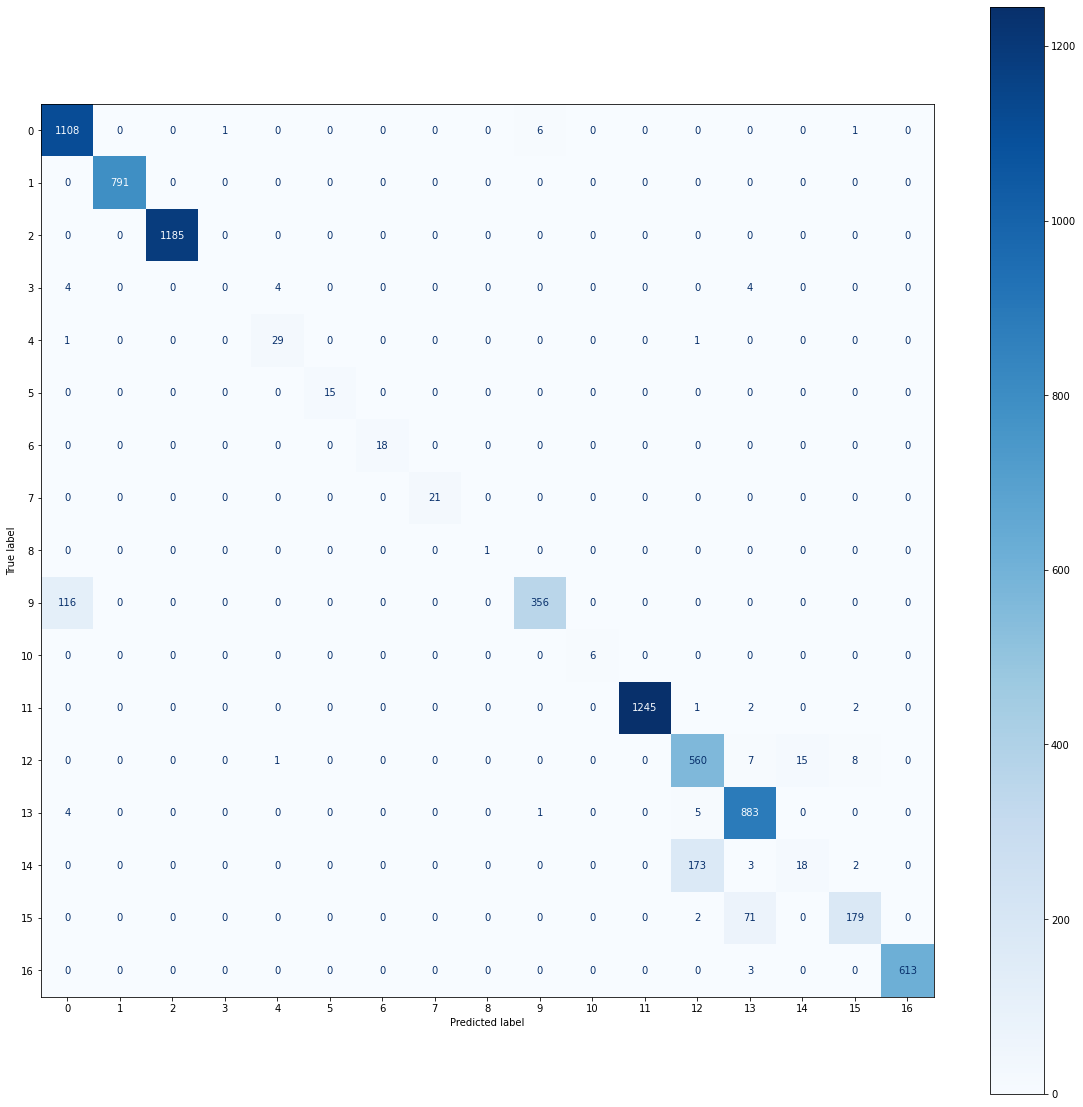

In [56]:
fig, ax = plt.subplots(figsize=(20, 20))
plot_confusion_matrix(reg_log_1,X_test_transformado,y_test, ax=ax, cmap=plt.cm.Blues)
plt.show()

**OPTIMIZAR LA REGRESIÓN**

In [61]:
reg_log_1 = LogisticRegression(random_state=42, multi_class='ovr', solver='liblinear', penalty='l1')
reg_log_1.fit(X_trian_transformado,y_train)
socre_log_reg_train1 = reg_log_1.score(X_trian_transformado,y_train)
socre_log_reg_test1 = reg_log_1.score(X_test_transformado,y_test)
print(f'Score entrenamiento: {socre_log_reg_train1}\nScore prueba: {socre_log_reg_test1}')

Score entrenamiento: 0.9340924313462826
Score prueba: 0.9410661666220198


In [65]:
reg_log_1 = LogisticRegression(random_state=42, multi_class='ovr', solver='liblinear', penalty='l2')
reg_log_1.fit(X_trian_transformado,y_train)
socre_log_reg_train1 = reg_log_1.score(X_trian_transformado,y_train)
socre_log_reg_test1 = reg_log_1.score(X_test_transformado,y_test)
print(f'Score entrenamiento: {socre_log_reg_train1}\nScore prueba: {socre_log_reg_test1}')

Score entrenamiento: 0.9340031256977004
Score prueba: 0.9413340476828288
